<a href="https://colab.research.google.com/github/nazalnihad/EfficientNet/blob/main/tutorial/train_logo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EfficientDet Training On A Custom Dataset



<table align="left"><td>
  <a target="_blank"  href="https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/blob/master/tutorial/train_logo.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on github
  </a>
</td><td>
  <a target="_blank"  href="https://colab.research.google.com/github/zylo117/Yet-Another-EfficientDet-Pytorch/blob/master/tutorial/train_logo.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td></table>

## This tutorial will show you how to train a custom dataset.

## Please enable GPU support to accelerate on notebook setting if you are using colab.

### 0. Install Requirements

In [2]:
!pip install pycocotools numpy==1.16.0 opencv-python tqdm tensorboard tensorboardX pyyaml webcolors matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 29.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 MB 8.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, an

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Prepare Custom Dataset/Pretrained Weights (Skip this part if you already have datasets and weights of your own)

In [3]:
import os
import sys
if "projects" not in os.getcwd():
  !git clone --depth 1 https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch
  os.chdir('Yet-Another-EfficientDet-Pytorch')
  sys.path.append('.')
else:
  !git pull

# download and unzip dataset
! mkdir datasets
# ! wget https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.1/dataset_logo.zip

! unzip -d datasets/ /content/drive/MyDrive/datasets.zip

# download pretrained weights
! mkdir weights
! wget https://github.com/zylo117/Yet-Another-EfficientDet-Pytorch/releases/download/1.0/efficientdet-d0.pth -O weights/efficientdet-d0.pth

# prepare project file projects/logo.yml
# showing its contents here
! cat projects/logo.yml

Streaming output truncated to the last 5000 lines.
 extracting: datasets/datasets/pest/val/DR1490.png  
 extracting: datasets/datasets/pest/val/DR1492.png  
 extracting: datasets/datasets/pest/val/DR1493.png  
 extracting: datasets/datasets/pest/val/DR150.png  
 extracting: datasets/datasets/pest/val/DR1502.png  
 extracting: datasets/datasets/pest/val/DR1505.png  
 extracting: datasets/datasets/pest/val/DR1514.png  
 extracting: datasets/datasets/pest/val/DR1522.png  
 extracting: datasets/datasets/pest/val/DR1524.png  
 extracting: datasets/datasets/pest/val/DR1529.png  
 extracting: datasets/datasets/pest/val/DR153.png  
 extracting: datasets/datasets/pest/val/DR154.png  
 extracting: datasets/datasets/pest/val/DR1541.png  
 extracting: datasets/datasets/pest/val/DR1545.png  
 extracting: datasets/datasets/pest/val/DR1549.png  
 extracting: datasets/datasets/pest/val/DR1557.png  
 extracting: datasets/datasets/pest/val/DR1569.png  
 extracting: datasets/datasets/pest/val/DR158.png  

### 2. Training

In [5]:
!pip install tensorboardX

  Using cached tensorboardX-2.6.2.2-py2.py3-none-any.whl.metadata (5.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.5 MB/s eta 0:00:00


In [7]:
# consider this is a simple dataset, train head will be enough.
! python train.py -c 0 -p logo --head_only True --lr 5e-3 --batch_size 32 --load_weights weights/efficientdet-d0.pth  --num_epochs 10 --save_interval 100

# the loss will be high at first
# don't panic, be patient,
# just wait for a little bit longer

loading annotations into memory...
Done (t=0.90s)
creating index...
index created!
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 12 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
/content/Yet-Another-EfficientDet-Pytorch/train.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mo

In [26]:
!rm -rf /content/Yet-Another-EfficientDet-Pytorch/res/datasets

In [27]:
# Step 2: Define the folder you want to save (in Colab) and the destination path (in Google Drive)
import shutil

# Folder in Colab you want to save (e.g., '/content/datasets')
folder_to_save = '/content/Yet-Another-EfficientDet-Pytorch/'

# Destination path in Google Drive (e.g., '/content/drive/MyDrive/saved_datasets')
# destination_path = '/content/drive/MyDrive/saved_weight'
destination_path = '/content/drive/MyDrive/efficientDet'

# Step 3: Copy the folder to Google Drive
shutil.copytree(folder_to_save, destination_path)

print(f"Folder '{folder_to_save}' has been saved to Google Drive at '{destination_path}'.")

Folder '/content/Yet-Another-EfficientDet-Pytorch/' has been saved to Google Drive at '/content/drive/MyDrive/efficientDet'.


In [24]:
!rm -rf /content/drive/MyDrive/efficientDet

In [ ]:
! python train.py -c 0 -p logo --head_only False --lr 1e-3 --batch_size 16 --load_weights last  --num_epochs 30 --save_interval 100

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
using weights logs//logo/efficientdet-d0_9_180.pth
[Info] loaded weights: efficientdet-d0_9_180.pth, resuming checkpoint from step: 180
Step: 184. Epoch: 4/30. Iteration: 37/37. Cls loss: 1.01281. Reg loss: 2.37766. Total loss: 3.39047: 100% 37/37 [00:16<00:00,  2.27it/s]
Val. Epoch: 4/30. Classification loss: 1.00430. Regression loss: 2.72571. Total loss: 3.73001
Step: 199. Epoch: 5/30. Iteration: 15/37. Cls loss: 0.75802. Reg loss: 1.94845. Total loss: 2.70647:  38% 14/37 [00:19<00:20,  1.14it/s]checkpoint...
Step: 221. Epoch: 5/30. Iteration: 37/37. Cls loss: 0.61092. Reg loss: 1.65059. Total loss: 2.26151: 100% 37/37 [00:37<00:00,  1.01s/it]
Val. Epoch: 5/30. Classification loss: 1.00675. Regression loss: 2.32956. Total loss: 3.33631
Step: 258. Epoch: 6/30. Iteration: 37/37. Cls loss: 0.45622. Reg loss: 0.91580. Total 

### 3. Evaluation

In [15]:
#get latest weight file
%cd /content/Yet-Another-EfficientDet-Pytorch/logs/pest
weight_file = !ls -Art | grep efficientdet
%cd ../..

#uncomment the next line to specify a weight file
#weight_file[-1] = 'efficientdet-d0_49_1400.pth'

! python coco_eval.py -c 0 -p logo -w "logs/pest/{weight_file[-1]}"

/content/Yet-Another-EfficientDet-Pytorch/logs/pest
/content/Yet-Another-EfficientDet-Pytorch
running coco-style evaluation on project logo, weights logs/pest/efficientdet-d0_9_7390.pth...
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
/content/Yet-Another-EfficientDet-Pytorch/coco_eval.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We 

### 4. Visualize

In [21]:
import os
import random
import torch
from torch.backends import cudnn
from backbone import EfficientDetBackbone
import cv2
import matplotlib.pyplot as plt
import numpy as np
from efficientdet.utils import BBoxTransform, ClipBoxes
from utils.utils import preprocess, invert_affine, postprocess

# Configuration
compound_coef = 0
force_input_size = None  # set None to use default size
folder_path = 'datasets/pest/val'  # Folder containing images
output_folder = 'infer_test'  # Folder to save results
n = 50  # Number of random images to process
threshold = 0.2
iou_threshold = 0.2

use_cuda = True
use_float16 = False
cudnn.fastest = True
cudnn.benchmark = True

obj_list = ['pest']

# Input sizes for EfficientDet
input_sizes = [512, 640, 768, 896, 1024, 1280, 1280, 1536]
input_size = input_sizes[compound_coef] if force_input_size is None else force_input_size

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load model
model = EfficientDetBackbone(compound_coef=compound_coef, num_classes=len(obj_list),
                             ratios=[(1.0, 1.0), (1.3, 0.8), (1.9, 0.5)],
                             scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])

weight_file = 'logs/pest/' + 'efficientdet-d0_9_7390.pth'  # Replace with your weight file
model.load_state_dict(torch.load(weight_file))
model.requires_grad_(False)
model.eval()

if use_cuda:
    model = model.cuda()
if use_float16:
    model = model.half()

# Get list of images in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
selected_images = random.sample(image_files, min(n, len(image_files)))  # Randomly select n images

# Process each selected image
for img_file in selected_images:
    img_path = os.path.join(folder_path, img_file)
    ori_imgs, framed_imgs, framed_metas = preprocess(img_path, max_size=input_size)

    if use_cuda:
        x = torch.stack([torch.from_numpy(fi).cuda() for fi in framed_imgs], 0)
    else:
        x = torch.stack([torch.from_numpy(fi) for fi in framed_imgs], 0)

    x = x.to(torch.float32 if not use_float16 else torch.float16).permute(0, 3, 1, 2)

    with torch.no_grad():
        features, regression, classification, anchors = model(x)

        regressBoxes = BBoxTransform()
        clipBoxes = ClipBoxes()

        out = postprocess(x,
                          anchors, regression, classification,
                          regressBoxes, clipBoxes,
                          threshold, iou_threshold)

    out = invert_affine(framed_metas, out)

    for i in range(len(ori_imgs)):
        if len(out[i]['rois']) == 0:
            continue
        ori_imgs[i] = ori_imgs[i].copy()
        for j in range(len(out[i]['rois'])):
            (x1, y1, x2, y2) = out[i]['rois'][j].astype(int)
            cv2.rectangle(ori_imgs[i], (x1, y1), (x2, y2), (255, 255, 0), 2)
            obj = obj_list[out[i]['class_ids'][j]]
            score = float(out[i]['scores'][j])

            cv2.putText(ori_imgs[i], '{}, {:.3f}'.format(obj, score),
                        (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (255, 255, 0), 1)

        # Save the result
        output_path = os.path.join(output_folder, img_file)
        cv2.imwrite(output_path, cv2.cvtColor(ori_imgs[i], cv2.COLOR_RGB2BGR))

    print(f"Processed and saved: {img_file}")

print(f"All {len(selected_images)} images processed and saved to '{output_folder}'.")

<ipython-input-21-b99a23eb949d>:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weight_file))


Processed and saved: IP6704.jpg
Processed and saved: LR1005.png
Processed and saved: DR1722.png
Processed and saved: IP7360.jpg
Processed and saved: IP3291.jpg
Processed and saved: LPT1308.png
Processed and saved: DPV907.png
Processed and saved: LPT755.png
Processed and saved: LP314.png
Processed and saved: LPT292.png
Processed and saved: LP205.png
Processed and saved: DP2689.png
Processed and saved: DP2385.png
Processed and saved: IP5494.jpg
Processed and saved: DRV817.png
Processed and saved: IP2511.jpg
Processed and saved: LPV122.png
Processed and saved: IP5623.jpg
Processed and saved: LPT1072.png
Processed and saved: IP3193.jpg
Processed and saved: IP1484.jpg
Processed and saved: LRT213.png
Processed and saved: LPT789.png
Processed and saved: LR1303.png
Processed and saved: IP8107.jpg
Processed and saved: IP4121.jpg
Processed and saved: IP6814.jpg
Processed and saved: DR2016.png
Processed and saved: LP1999.png
Processed and saved: LRT895.png
Processed and saved: IP1080.jpg
Processe

In [20]:
!rm -rf /content/Yet-Another-EfficientDet-Pytorch/infer_test

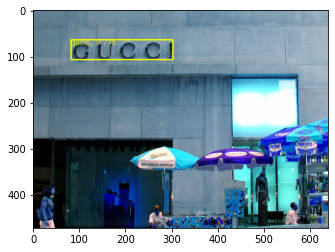

In [ ]:
import torch
from torch.backends import cudnn

from backbone import EfficientDetBackbone
import cv2
import matplotlib.pyplot as plt
import numpy as np

from efficientdet.utils import BBoxTransform, ClipBoxes
from utils.utils import preprocess, invert_affine, postprocess

compound_coef = 0
force_input_size = None  # set None to use default size
img_path = 'datasets/logo/val/208.jpg'

threshold = 0.2
iou_threshold = 0.2

use_cuda = True
use_float16 = False
cudnn.fastest = True
cudnn.benchmark = True

obj_list = [ 'adidas0', 'chanel','gucci','hh','lacoste','mk','nike','prada','puma','supreme' ]

# tf bilinear interpolation is different from any other's, just make do
input_sizes = [512, 640, 768, 896, 1024, 1280, 1280, 1536]
input_size = input_sizes[compound_coef] if force_input_size is None else force_input_size
ori_imgs, framed_imgs, framed_metas = preprocess(img_path, max_size=input_size)

if use_cuda:
    x = torch.stack([torch.from_numpy(fi).cuda() for fi in framed_imgs], 0)
else:
    x = torch.stack([torch.from_numpy(fi) for fi in framed_imgs], 0)

x = x.to(torch.float32 if not use_float16 else torch.float16).permute(0, 3, 1, 2)

model = EfficientDetBackbone(compound_coef=compound_coef, num_classes=len(obj_list),

                             # replace this part with your project's anchor config
                             ratios=[(1.0, 1.0), (1.3, 0.8), (1.9, 0.5)],
                             scales=[2 ** 0, 2 ** (1.0 / 3.0), 2 ** (2.0 / 3.0)])

model.load_state_dict(torch.load('logs/logo/'+weight_file[-1]))
model.requires_grad_(False)
model.eval()

if use_cuda:
    model = model.cuda()
if use_float16:
    model = model.half()

with torch.no_grad():
    features, regression, classification, anchors = model(x)

    regressBoxes = BBoxTransform()
    clipBoxes = ClipBoxes()

    out = postprocess(x,
                      anchors, regression, classification,
                      regressBoxes, clipBoxes,
                      threshold, iou_threshold)

out = invert_affine(framed_metas, out)

for i in range(len(ori_imgs)):
    if len(out[i]['rois']) == 0:
        continue
    ori_imgs[i] = ori_imgs[i].copy()
    for j in range(len(out[i]['rois'])):
        (x1, y1, x2, y2) = out[i]['rois'][j].astype(np.int)
        cv2.rectangle(ori_imgs[i], (x1, y1), (x2, y2), (255, 255, 0), 2)
        obj = obj_list[out[i]['class_ids'][j]]
        score = float(out[i]['scores'][j])

        cv2.putText(ori_imgs[i], '{}, {:.3f}'.format(obj, score),
                    (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                    (255, 255, 0), 1)

        plt.imshow(ori_imgs[i])

